Emmanuel Johnson<br>
Professor Curry<br>
CPS 493 Image Processing<br>
04/04/2023<br>
In Class Project - Assignment 3<br>

Combine your RGB to HSV function from Assignment 2 with the nested pixel loop example from Module 2.  Pixel by pixel loop through the RGB image and convert it to HSV.  Your function should now take a full RGB image and return an image converted to HSV.  Finally, replace the Open CV function (cv2.cvtColor()) in your image pipeline with the new function you created.  Submit your function and pipeline in one Jupyter Notebook.  (note: your function will have a slower run time)
Extra Credit (10 pts.)
Create a BGR to RGB function and apply it to your pipeline.  Submit one Jupyter Notebook for with both functions and your pipeline.
Do you own work and name your files correctly!  Points will be taken off from now on.

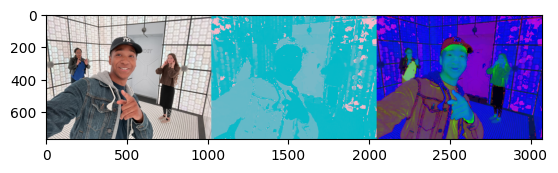

In [3]:
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
from numpy import interp

def RGB2HSV(rgb):
    # Input: rgb is an 1-D array [r,g,b] with values in range [0,255]. 
    # r = rgb[0], b = rgb[1], g = rgb[2]
    # Output: hsv is an 1-D array [h,s,v] with values in range h = [0,360], s = [0,1], v = [0,1].

    # Normalize color values.  Convert to floating point values between 0 - 1
    rgb = rgb/255

    # Initialize HSV
    #took away the decimal point values
    h = 0.0
    s = 0.0
    v = 0.0

    # Find the max and min RGB values. 
    v = np.max(rgb)
    vMin = np.min(rgb)

    # Set the saturation value.
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    # Calculate (v - vMin) convenience
    diff = (v - vMin)

    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal. 
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0][0][0] == v):
        h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[0][0][1] == v):
        h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[0][0][2] == v):
        h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff
    
    # Convert to OpenCv ranges
    #Personal note: This may also be referred to as Interpolation
    h = math.floor(round(h)/2)
    s = round(np.interp(.725,[0,1],[0,255]))
    v = round(np.interp(.78431,[0,1],[0,255]))

    
    #print("HSV converted to OpenCv's range:", [[[round(hsv[0]/2),round(s),round(v)]]])

    # Return hsv values.
    return np.array([[[h,s,v]]])

#Import Image
img = cv2.imread('mephoto2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = copy.deepcopy(img)
plt.imshow(img)
'''
convert as HSV and print
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)
'''

#Save the height and width.
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]


#going through each RGB value

#For each row in our grid. y = row
for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
            RGB = np.uint8([[img[y][x]]])
            HSV = RGB2HSV(RGB)
            img2[y,x,0] = HSV[0][0][0]
            img2[y,x,1] = HSV[0][0][1]
            img2[y,x,2] = HSV[0][0][2]
            
#what the hsv should look like
img3 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#plt.imshow(img3)

#Combine the HSV and the original image so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((img, img2, img3), axis=1)

#Draw the image.  Use matplotlib while using a python notebook. 
plt.imshow(imgTwo)


